<a href="https://colab.research.google.com/github/ahmadmasood43/Glioblastoma-Detection-and-VR-Conversion/blob/main/2D_to_3D_objects_in_STL_format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Numpy-stl library


In [ ]:
!pip3 install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

[-1 -1 -1]
[-1  1 -1]
[ 1 -1 -1]
[ 1 -1 -1]
[-1  1 -1]
[ 1  1 -1]
[-1 -1 -1]
[-1 -1  1]
[-1  1  1]
[-1 -1 -1]
[-1  1  1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 1 1]
[-1 -1  1]
[1 1 1]
[-1  1  1]
[ 1 -1  1]
[ 1 -1 -1]
[ 1  1 -1]
[ 1 -1  1]
[ 1  1 -1]
[1 1 1]
[ 1  1 -1]
[-1  1 -1]
[1 1 1]
[-1  1 -1]
[-1  1  1]
[1 1 1]
[-1 -1 -1]
[ 1 -1 -1]
[ 1 -1  1]
[-1 -1 -1]
[ 1 -1  1]
[-1 -1  1]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating 3d array of vertices from 3 different views of MRI images

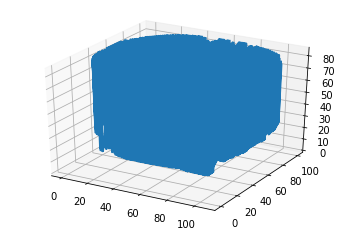

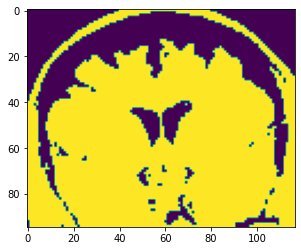

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


im1 = cv.imread('/content/drive/MyDrive/FYP Images data /1.jpeg', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('/content/drive/MyDrive/FYP Images data /2.jpeg', cv.IMREAD_GRAYSCALE)
im3 = cv.imread('/content/drive/MyDrive/FYP Images data /3.jpeg', cv.IMREAD_GRAYSCALE)
a1, b1 = im1.shape                     # a1 = b2  b1 = b3 a2 = a3
a2, b2 = im2.shape
a3, b3 = im3.shape
ret, thresh1 = cv.threshold(im1, 120, 255, cv.THRESH_BINARY)
ret2, thresh2 = cv.threshold(im2, 100, 255, cv.THRESH_BINARY)
ret3, thresh3 = cv.threshold(im3, 70, 255, cv.THRESH_BINARY)
image = np.zeros((a1, b1, a2))
for i in range(a1):
    for j in range(b1):
        for k in range(a2):
            try:
                if (thresh1[i][j] > 0) and (thresh2[k][i]) > 0 and (thresh3[k][j] > 0):
                    image[i][j][k] = 255
            except:
                image[i][j][k] = 0
#print(a1)
#print(b1)
#print(a2)
#print(b2)
#print(a3)
#print(b3)
#print(image)
fig = plt.figure()
ax = plt.axes(projection='3d')
x, y, z = image.nonzero()
ax.plot(x, y, z)
plt.show()
plt.imshow(thresh1)
plt.imshow(thresh2)
plt.imshow(thresh3)


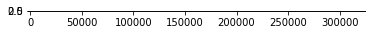

In [ ]:
arr = (x,y,z)
plt.imshow(arr)

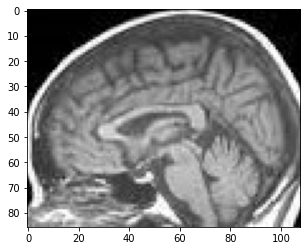

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/drive/MyDrive/FYP Images data /2.jpeg")
plt.imshow(im)


Convert image to grey scale


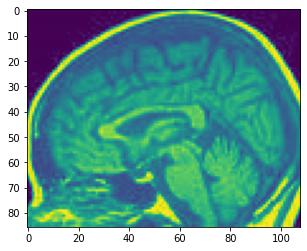

In [ ]:
grey_img = Image.open('/content/drive/MyDrive/FYP Images data /2.jpeg').convert('L')
plt.imshow(grey_img)

Create simple 2d square surface with 2 triangles

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1]])

# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0]
])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('surface.stl')

Creating Brain.stl file

In [ ]:
grey_img = Image.open('/content/drive/MyDrive/FYP Images data /2.jpeg').convert('L')

max_size=(500,500)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

print(vertices)
print(vertices[1][1])
faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('side_bain.stl')
print(surface)

[[  2   2   2 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [127 130 141 ... 168   7   0]
 [132 139 158 ...  94   2  12]
 [153 122 161 ...  28   4  16]]
[[[0.00000000e+00 0.00000000e+00 7.84313725e-02]
  [1.00000000e+00 0.00000000e+00 7.84313725e-02]
  [2.00000000e+00 0.00000000e+00 7.84313725e-02]
  ...
  [1.05000000e+02 0.00000000e+00 3.92156863e-02]
  [1.06000000e+02 0.00000000e+00 3.92156863e-02]
  [1.07000000e+02 0.00000000e+00 3.92156863e-02]]

 [[0.00000000e+00 1.00000000e+00 3.92156863e-02]
  [1.00000000e+00 1.00000000e+00 3.92156863e-02]
  [2.00000000e+00 1.00000000e+00 3.92156863e-02]
  ...
  [1.05000000e+02 1.00000000e+00 3.92156863e-02]
  [1.06000000e+02 1.00000000e+00 3.92156863e-02]
  [1.07000000e+02 1.00000000e+00 3.92156863e-02]]

 [[0.00000000e+00 2.00000000e+00 3.92156863e-02]
  [1.00000000e+00 2.00000000e+00 3.92156863e-02]
  [2.00000000e+00 2.00000000e+00 3.92156863e-02]
  ...
  [1.05000000e+02 2.00000000e+00 3.92156863e-02]
  

Test Code :


In [ ]:
from pickle import BININT1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


im1 = cv.imread('/content/drive/MyDrive/FYP Images data /1.jpeg', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('/content/drive/MyDrive/FYP Images data /2.jpeg', cv.IMREAD_GRAYSCALE)
im3 = cv.imread('/content/drive/MyDrive/FYP Images data /3.jpeg', cv.IMREAD_GRAYSCALE)
a1, b1 = im1.shape                     # a1 = b2  b1 = b3 a2 = a3
a2, b2 = im2.shape
a3, b3 = im3.shape
ret, thresh1 = cv.threshold(im1, 120, 255, cv.THRESH_BINARY)
ret2, thresh2 = cv.threshold(im2, 100, 255, cv.THRESH_BINARY)
ret3, thresh3 = cv.threshold(im3, 70, 255, cv.THRESH_BINARY)
image = np.zeros((a1, b1, a2))
for i in range(a1):
    for j in range(b1):
        for k in range(a2):
            try:
                if (thresh1[i][j] > 0) and (thresh2[k][i]) > 0 and (thresh3[k][j] > 0):
                    image[i][j][k] = 255
            except:
                image[i][j][k] = 0

for x in range(0, a1-1):
  for y in range(0, b1-1):
    for z in range(0, a2-1):
       vertices[x][y]=(x, y, z)


#print(image)
print(a1-1,b1,a2)
print(image)
print(vertices)

faces=[]

for x in range(0, b1 - 1):
  for y in range(0, a1 - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('test_brain.stl')
print(surface)



120 101 86
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

In [ ]:
!ls -alh /content

total 2.4M
drwxr-xr-x 1 root root 4.0K Dec 29 03:29 .
drwxr-xr-x 1 root root 4.0K Dec 29 02:45 ..
-rw-r--r-- 1 root root 1.2M Dec 29 03:12 bain.stl
drwxr-xr-x 4 root root 4.0K Dec 20 20:18 .config
-rw-r--r-- 1 root root  684 Dec 29 02:51 cube.stl
drwx------ 5 root root 4.0K Dec 29 02:51 drive
drwxr-xr-x 1 root root 4.0K Dec 20 20:19 sample_data
-rw-r--r-- 1 root root  184 Dec 29 03:12 surface.stl
-rw-r--r-- 1 root root 1.2M Dec 29 03:40 test_brain.stl
